In [1]:
import data_mod as eurostat
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

# Testing clustering with only frequency 'Every day'
alc_edu_freq = eurostat.AlcoholDataset(dataset_name='hlth_ehis_al1e', dataset_group='education', frequences= ['Every day']).get_dataset()
alc_edu_freq_data = alc_edu_freq[alc_edu_freq['TIME_PERIOD'] == 2014].drop(['TIME_PERIOD'], axis=1)


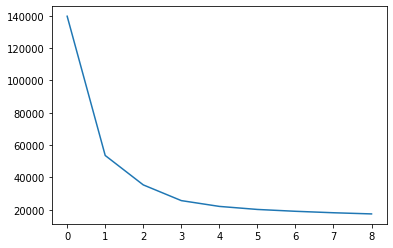

In [3]:
# Test optimal number of cluster with elbow method

cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(alc_edu_freq_data, categorical=[0,1,2,3])
    cost.append(kproto.cost_)

plt.plot(cost)


In [4]:
print(cost)

[139705.19724571536, 53579.57280995628, 35391.55322867352, 25668.639499937362, 22083.38438221134, 20202.827459616074, 19063.87452644401, 18157.457086242448, 17438.239634066143]


In [5]:
# Testing with optimal number of clusters

kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(alc_edu_freq_data, categorical=[0,1,2,3])

cluster_dict =[]
for c in clusters:
    cluster_dict.append(c)

alc_edu_freq_with_clusters = alc_edu_freq_data.copy()
alc_edu_freq_with_clusters['clusters'] = cluster_dict

In [6]:
alc_edu_freq_data_clust_0 = alc_edu_freq_with_clusters[alc_edu_freq_with_clusters['clusters'] == 0 ]
alc_edu_freq_data_clust_1 = alc_edu_freq_with_clusters[alc_edu_freq_with_clusters['clusters'] == 1 ]
alc_edu_freq_data_clust_2 = alc_edu_freq_with_clusters[alc_edu_freq_with_clusters['clusters'] == 2 ]